# **Introduction**

**The Customer Shopping Preferences Dataset offers valuable insights into consumer behavior and purchasing patterns. Understanding customer preferences and trends is critical for businesses to tailor their products, marketing strategies, and overall customer experience.**

## **Dataset Location: Brazil**

## **I will be using following method:**
* **Data Extraction: SQLite**
* **Data Manipulation: Python, pandas**
* **Data Analysis: matplotlib, seaborn and plotly**

# Import Libraries
Let's import all necessary libraries for the analysis and along with it let's bring down our dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.patches import ConnectionPatch


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/products.csv
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/geolocation.csv
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/order_items.csv
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/orders.csv
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/order_reviews.xlsx
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/OTT_dataset_test.csv
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/customers.csv
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/sellers.csv
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/payments.csv
/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/order_reviews.csv


# The data is available in 8 csv files:
1. products.csv
2. geolocation.csv
3. order_items.csv
4. orders.csv
5. order_reviews.csv
6. customers.csv
7. sellers.csv
8. payments.csv

## **Database Schema**
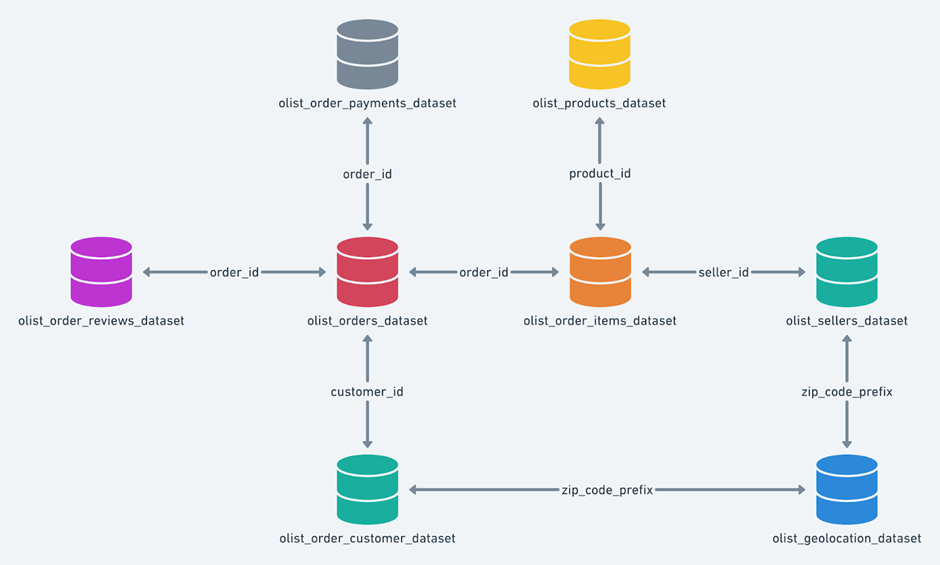

# Loading Data

In [2]:
import sqlite3

# Define the path
path = '/kaggle/input/sumeru-dataset/Sumeru SQL Data Set Test/'

# Read CSV files into Pandas DataFrames
products_df = pd.read_csv(path + 'products.csv')
geolocation_df = pd.read_csv(path + 'geolocation.csv')
order_items_df = pd.read_csv(path + 'order_items.csv')
orders_df = pd.read_csv(path + 'orders.csv')
customers_df = pd.read_csv(path + 'customers.csv')
sellers_df = pd.read_csv(path + 'sellers.csv')
payments_df = pd.read_csv(path + 'payments.csv')

# Read the Excel file
order_reviews_df = pd.read_excel(path + 'order_reviews.xlsx')


# Create an SQLite connection and cursor
conn = sqlite3.connect(':memory:')  # Use an in-memory database for demonstration
cursor = conn.cursor()

# Store DataFrames in the SQLite database
products_df.to_sql('products', conn, index=False)
geolocation_df.to_sql('geolocation', conn, index=False)
order_items_df.to_sql('order_items', conn, index=False)
orders_df.to_sql('orders', conn, index=False)
customers_df.to_sql('customers', conn, index=False)
sellers_df.to_sql('sellers', conn, index=False)
payments_df.to_sql('payments', conn, index=False)
order_reviews_df.to_sql('order_reviews', conn, index=False)

99224

# **Checking the structure & characteristics of the dataset:**

In [3]:
query = '''
SELECT * FROM customers
LIMIT 5;
'''
pd.read_sql_query(query, conn)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Data type of all columns in the "customers" table.

In [4]:
query = '''
PRAGMA table_info(customers);
'''
pd.read_sql_query(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,customer_id,TEXT,0,None,0
1,1,customer_unique_id,TEXT,0,None,0
2,2,customer_zip_code_prefix,INTEGER,0,None,0
3,3,customer_city,TEXT,0,None,0
4,4,customer_state,TEXT,0,None,0


## Data type of all columns in the "orders" table.

In [5]:
query = '''
SELECT * FROM orders
LIMIT 5;
'''
pd.read_sql_query(query, conn)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
query = '''
PRAGMA table_info(orders);
'''
pd.read_sql_query(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,order_id,TEXT,0,None,0
1,1,customer_id,TEXT,0,None,0
2,2,order_status,TEXT,0,None,0
3,3,order_purchase_timestamp,TEXT,0,None,0
4,4,order_approved_at,TEXT,0,None,0
5,5,order_delivered_carrier_date,TEXT,0,None,0
6,6,order_delivered_customer_date,TEXT,0,None,0
7,7,order_estimated_delivery_date,TEXT,0,None,0


# Data Analysis

## The time range between which the orders were placed.

In [7]:
query = '''
SELECT 
    DISTINCT Min(order_purchase_timestamp) AS MinOrderDate,
    Max(order_purchase_timestamp) AS MaxOrderDate
FROM orders
WHERE order_status = 'delivered';
'''
pd.read_sql_query(query, conn)
# The dataset contains orders placed between September 15, 2016, 12:16:38 PM, and August 29, 2018, 3:00:37 PM.

,MinOrderDate,MaxOrderDate
0,2016-09-15 12:16:38,2018-08-29 15:00:37


## Count the Cities & States of customers who ordered during the given period.

> **We can see Sao Paulo, SP has most orders follow by Rio De Janeiro, RJ. These two cities combine have 21K+ orders.**

In [8]:
query = '''
SELECT 
    DISTINCT c.customer_city AS City, 
    c.customer_state AS State, 
    Count(o.customer_id) AS Customer_Count
FROM customers c
JOIN orders o
ON c.customer_id = o.customer_id
WHERE 
    o.order_purchase_timestamp BETWEEN '2016-09-15 12:16:38' AND '2018-08-29 15:00:37'
GROUP BY City, State
ORDER BY 3 DESC;
'''
query_table = pd.read_sql_query(query, conn)
pd.read_sql_query(query, conn)

,City,State,Customer_Count
0,sao paulo,SP,15536
1,rio de janeiro,RJ,6881
2,belo horizonte,MG,2770
3,brasilia,DF,2131
4,curitiba,PR,1521
...,...,...,...
4305,vitoria do jari,AP,1
4306,vitorino,PR,1
4307,vitorinos,MG,1
4308,wagner,BA,1


## How are the customers distributed across all the states?

>  **State SP has a customer base three times larger than that of RJ.**

In [9]:
query = '''
SELECT
    customers.customer_state AS State,
    COUNT(customer_id) AS Customer_Count
FROM customers
GROUP BY customers.customer_state
ORDER BY 2 DESC;
'''
query_table = pd.read_sql_query(query, conn)
pd.read_sql_query(query, conn)

,State,Customer_Count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


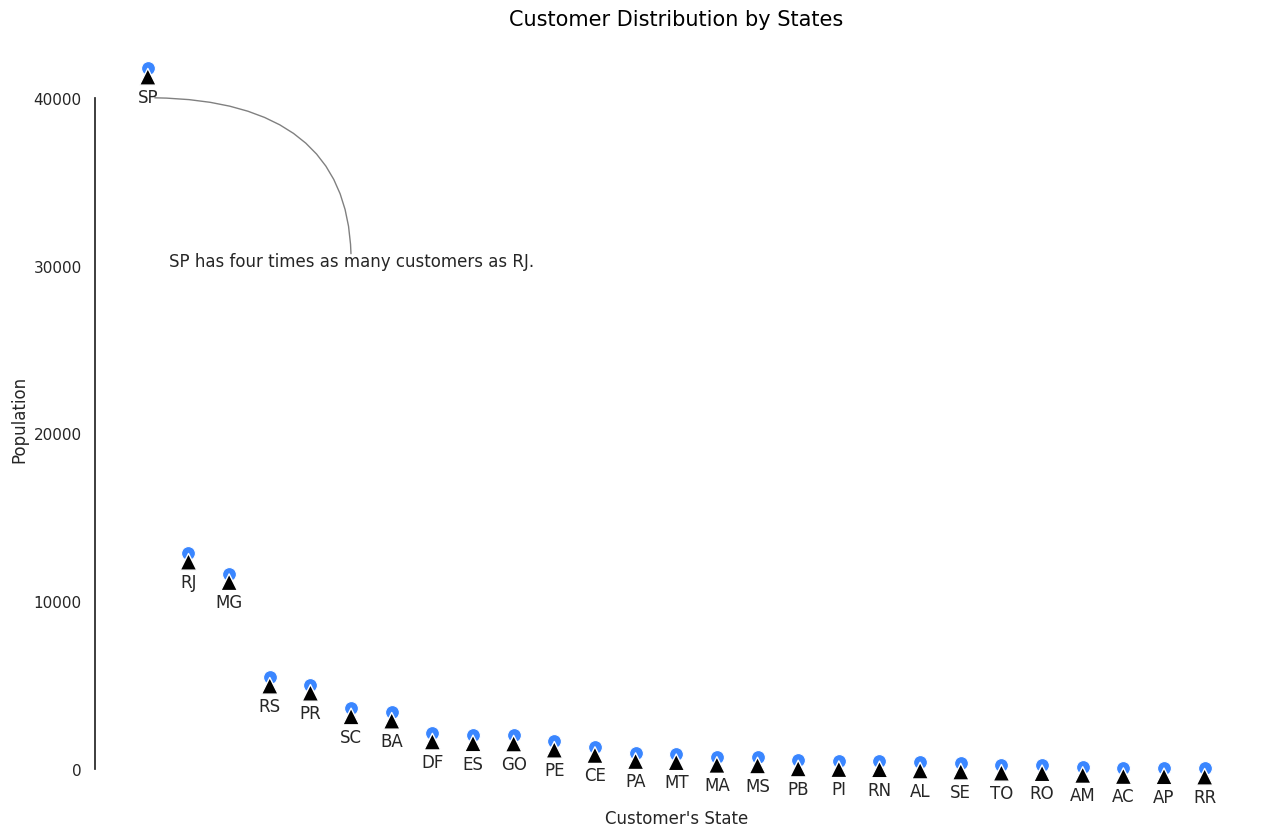

In [10]:
plt.figure(figsize=(15, 10))
sns.set_theme(style="white", palette=None)

# Scatter plot | State x Customer Counter
ax = sns.scatterplot(data=query_table, x="State", y="Customer_Count", s=100, color="#3a86ff")
sns.despine(trim=True, bottom=True)

plt.xlabel("Customer's State")
plt.xticks([])
plt.ylabel("Population")
plt.title("Customer Distribution by States", color="Black", size=15)

arrowprops = dict(facecolor='black', shrink=1)
for idx, data in enumerate(query_table.values):
    plt.annotate(
        data[0],
        xy=(idx, data[1]),
        xytext=(idx, data[1]-2000),
        arrowprops=arrowprops,
        ha='center'
    )

arrowprops=dict(arrowstyle="-", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="angle3,angleA=90,angleB=0",
                                )

plt.annotate(
    "SP has four times as many customers as RJ.",
    xy=(0, 40000),
    xytext=(5, 30000),
    arrowprops=arrowprops,
    ha='center'
)
plt.show()

## The Total & Average value of order price for each state.
> **Although the SP state has the highest total order price, its average is surprisingly the lowest.**

In [11]:
query = '''
SELECT 
    c.customer_state AS State,
    ROUND(SUM(ot.price),1) AS 'Order Total',
    ROUND(AVG(ot.price),1) AS 'Order Average'
FROM orders o
JOIN order_items ot
ON o.order_id = ot.order_id
JOIN customers c
ON c.customer_id = o.customer_id
GROUP BY 1
ORDER BY 2 DESC;
'''
pd.read_sql_query(query, conn)

,State,Order Total,Order Average
0,SP,5202955.1,109.7
1,RJ,1824092.7,125.1
2,MG,1585308.0,120.7
3,RS,750304.0,120.3
4,PR,683083.8,119.0
5,SC,520553.3,124.7
6,BA,511350.0,134.6
7,DF,302603.9,125.8
8,GO,294591.9,126.3
9,ES,275037.3,121.9


## The Total & Average value of order freight for each state.
> **Again, Although the SP state has the highest total Freight cost, its average is surprisingly the lowest.**

In [12]:
query = '''
SELECT 
    c.customer_state AS State,
    ROUND(SUM(ot.freight_value),1) AS 'Order Freight Total',
    ROUND(AVG(ot.freight_value),1) AS 'Order Freight Average'
FROM orders o
JOIN order_items ot
ON o.order_id = ot.order_id
JOIN customers c
ON c.customer_id = o.customer_id
GROUP BY 1
ORDER BY 2 DESC;
'''
pd.read_sql_query(query, conn)

,State,Order Freight Total,Order Freight Average
0,SP,718723.1,15.1
1,RJ,305589.3,21.0
2,MG,270853.5,20.6
3,RS,135522.7,21.7
4,PR,117851.7,20.5
5,BA,100156.7,26.4
6,SC,89660.3,21.5
7,PE,59449.7,32.9
8,GO,53115.0,22.8
9,DF,50625.5,21.0


## Is there a growing trend in the number of orders placed over the past years?
> **Yes, there is a noticeable upward trend in the number of orders over the years. It's important to note that data from September 2016 to August 2018 accounts for this analysis. Despite this, it remains impressive to witness the substantial growth over the years. the period from 2017 to AUG, 2018 experienced an growth of about 19%. During 2018, there were more orders placed in 8 months compared to the entire year of 2017.**

In [13]:
query = '''
SELECT 
    strftime('%Y', order_purchase_timestamp) as Year, 
    COUNT(order_id) as Order_Count
FROM orders
GROUP BY Year;
'''

pd.read_sql_query(query, conn)

,Year,Order_Count
0,2016,329
1,2017,45101
2,2018,54011


In [14]:
query = '''
SELECT 
    strftime('%m', order_purchase_timestamp) as Month,
    strftime('%Y', order_purchase_timestamp) as Year,
    CASE
        WHEN CAST(strftime('%H', order_purchase_timestamp) AS INTEGER) BETWEEN 0 AND 6 THEN 'Dawn'
        WHEN CAST(strftime('%H', order_purchase_timestamp) AS INTEGER) BETWEEN 7 AND 12 THEN 'Mornings'
        WHEN CAST(strftime('%H', order_purchase_timestamp) AS INTEGER) BETWEEN 13 AND 18 THEN 'Afternoon'
        WHEN CAST(strftime('%H', order_purchase_timestamp) AS INTEGER) BETWEEN 19 AND 23 THEN 'Night'
        ELSE 'Unknown'
    END as Time,
    COUNT(order_id) as Order_Count
FROM orders
GROUP BY Month, Time
ORDER BY Order_Count DESC;
'''
time_df = pd.read_sql_query(query, conn)
month_names = {f"{month:02d}": calendar.month_name[month] for month in range(1, 13)}
time_df["Month"] = time_df["Month"].map(month_names)
time_df

,Month,Year,Time,Order_Count
0,August,2017,Afternoon,4155
1,May,2017,Afternoon,4082
2,July,2018,Afternoon,4019
3,March,2018,Afternoon,3836
4,June,2018,Afternoon,3560
5,April,2017,Afternoon,3547
6,February,2018,Afternoon,3342
7,January,2017,Afternoon,3175
8,August,2018,Mornings,3083
9,August,2018,Night,3034


## Can we see some kind of monthly seasonality in terms of the noumber of orders being placed?
> **During the summer, we observe a growth in placed orders. It's essential to note that the data concludes in August 2018, which could be a reason for the decrease in orders post-August.**

In [15]:
time_df.groupby("Month")[["Order_Count"]].sum().sort_values(by='Order_Count', ascending=False).reset_index()

,Month,Order_Count
0,August,10843
1,May,10573
2,July,10318
3,March,9893
4,June,9412
5,April,9343
6,February,8508
7,January,8069
8,November,7544
9,December,5674


## During what time of the day, do the Brazilian customers mostly place their orders? (Dawn, Morning, Afternoon or Night)
> **It's understandable that there are few orders from 0 to 6 am, while throughout the day, there is a consistent flow of placed orders, with a noticeable surge during the afternoon.**

In [16]:
time_df.groupby("Time")[["Order_Count"]].sum().sort_values("Order_Count", ascending=False).reset_index()

,Time,Order_Count
0,Afternoon,38135
1,Night,28331
2,Mornings,27733
3,Dawn,5242


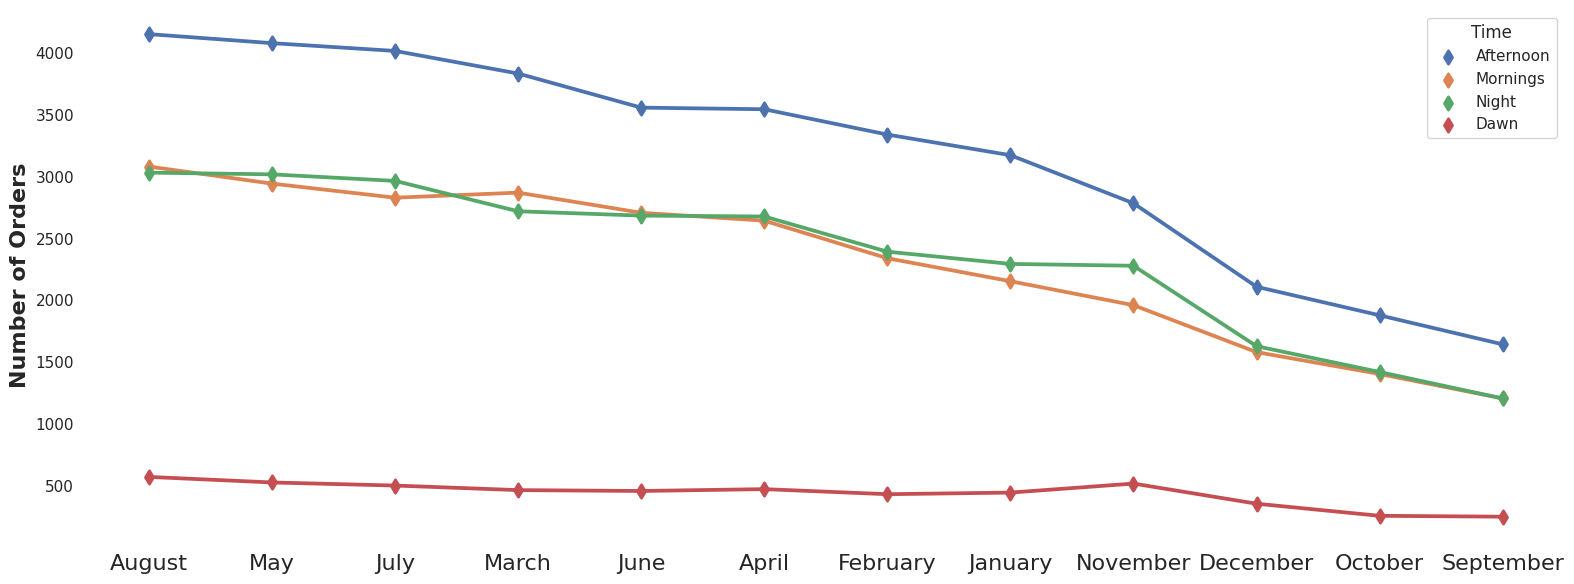

In [17]:
plt.figure(figsize = (16, 6))
sns.set_theme(style="white")
sns.pointplot(data=time_df, x="Month", y="Order_Count", hue="Time", markers="d")
sns.despine(top=True, right=True, left=True, bottom=True)
plt.ylabel("Number of Orders", fontsize=16, weight='bold')
plt.xlabel("")
plt.xticks(rotation=0, ha='center', fontsize=16)
plt.tight_layout()
plt.show()

## Do customers prefer seasonal shopping?
> **The number of orders significantly increases during summer months compared to winter months.**

In [18]:
def season(month_name):
    month_name = month_name.capitalize()
    if month_name in ["December", "January", "February"]:
        return "Winter"
    elif month_name in ["March", "April", "May"]:
        return "Spring"
    elif month_name in ["June", "July", "August"]:
        return "Summer"
    elif month_name in ["September", "October", "November"]:
        return "Autumn"
    else:
        return "Invalid month name"

time_df["Season"] = time_df.Month.apply(season)
time_df.groupby("Season")[["Order_Count"]].sum().reset_index()

,Season,Order_Count
0,Autumn,16808
1,Spring,29809
2,Summer,30573
3,Winter,22251


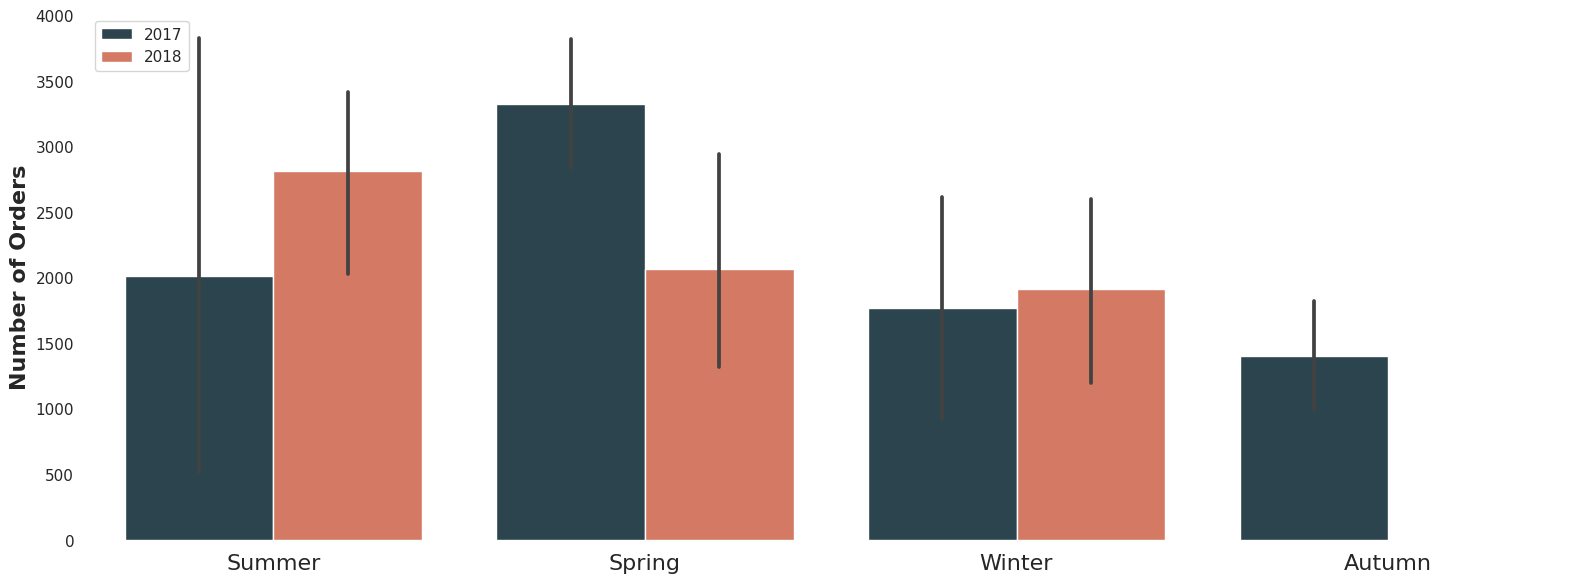

In [19]:
plt.figure(figsize = (16, 6))
sns.set_theme(style="white")
sns.barplot(time_df, x="Season", y="Order_Count", hue="Year", palette=['#264653', '#e76f51'])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.legend(loc="best")
plt.ylabel("Number of Orders", fontsize=16, weight='bold')
plt.xlabel("")
plt.xticks(rotation=0, ha='center', fontsize=16)
plt.tight_layout()
plt.show();

## **Evolution of E-commerce orders in the Brazil region:**

## Month-over-month order volume for each state.
> **State SP with most customers have most orders placed throughout the year.**

In [20]:
query = '''
SELECT
    customers.customer_state AS State,
    strftime('%m', order_purchase_timestamp) AS Month,
    COUNT(orders.order_id) AS Order_Count
FROM orders
JOIN customers
ON orders.customer_id = customers.customer_id
GROUP BY 1, 2
ORDER BY 2 ASC, 3 DESC;
'''
state = pd.read_sql_query(query, conn)

In [21]:
state.pivot_table(index="State", columns="Month", values="Order_Count", aggfunc=['sum'])

sum                                                                  \
Month      01      02      03      04      05      06      07      08      09   
State                                                                           
AC        8.0     6.0     4.0     9.0    10.0     7.0     9.0     7.0     5.0   
AL       39.0    39.0    40.0    51.0    46.0    34.0    40.0    34.0    20.0   
AM       12.0    16.0    14.0    19.0    19.0     8.0    23.0     9.0     9.0   
AP       11.0     4.0     8.0     5.0    11.0     4.0     7.0     5.0     2.0   
BA      264.0   273.0   340.0   318.0   368.0   307.0   405.0   323.0   170.0   
CE       99.0   101.0   126.0   143.0   136.0   121.0   140.0   130.0    77.0   
DF      151.0   196.0   207.0   183.0   208.0   220.0   243.0   232.0    97.0   
ES      159.0   186.0   182.0   188.0   228.0   204.0   206.0   200.0    93.0   
GO      164.0   176.0   199.0   177.0   226.0   184.0   192.0   213.0    88.0   
MA       66.0    67.0    77.0    73.0    65.0    59.0    79.0    70.0    42.0   
MG      971.0  1063.0  1237.0  1061.0  1190.0  1080.0  1111.0  1177.0   511.0   
MS       71.0    75.0    79.0    58.0    74.0    76.0    74.0    59.0    33.0   
MT       96.0    84.0    71.0    92.0   104.0    83.0    85.0    78.0    35.0   
PA       82.0    83.0   109.0   107.0    75.0    92.0    96.0   104.0    41.0   
PB       33.0    47.0    55.0    51.0    47.0    51.0    79.0    46.0    29.0   
PE      113.0   146.0   153.0   154.0   174.0   140.0   210.0   170.0    76.0   
PI       55.0    46.0    48.0    50.0    56.0    43.0    52.0    43.0    23.0   
PR      443.0   460.0   504.0   500.0   524.0   478.0   523.0   556.0   183.0   
RJ      990.0  1176.0  1302.0  1172.0  1321.0  1128.0  1288.0  1307.0   612.0   
RN       51.0    31.0    52.0    42.0    39.0    49.0    56.0    40.0    24.0   
RO       23.0    25.0    29.0    20.0    26.0    22.0    27.0    23.0    16.0   
RR        2.0     7.0     8.0     4.0     3.0     8.0     6.0     NaN     2.0   
RS      427.0   473.0   569.0   488.0   559.0   526.0   565.0   599.0   279.0   
SC      345.0   316.0   362.0   351.0   379.0   321.0   356.0   365.0   157.0   
SE       24.0    27.0    43.0    27.0    19.0    37.0    42.0    43.0    16.0   
SP     3351.0  3357.0  4047.0  3967.0  4632.0  4104.0  4381.0  4982.0  1648.0   
TO       19.0    28.0    28.0    33.0    34.0    26.0    23.0    28.0    17.0   

                               
Month      10      11      12  
State                          
AC        6.0     5.0     5.0  
AL       30.0    26.0    14.0  
AM        3.0    10.0     6.0  
AP        3.0     4.0     4.0  
BA      170.0   250.0   192.0  
CE       74.0   108.0    81.0  
DF      104.0   168.0   131.0  
ES      104.0   170.0   113.0  
GO      117.0   157.0   127.0  
MA       52.0    56.0    41.0  
MG      600.0   943.0   691.0  
MS       34.0    46.0    36.0  
MT       55.0    74.0    50.0  
PA       58.0    70.0    58.0  
PB       31.0    30.0    37.0  
PE       87.0   126.0   103.0  
PI       25.0    31.0    23.0  
PR      225.0   378.0   271.0  
RJ      725.0  1048.0   783.0  
RN       27.0    44.0    30.0  
RO       14.0    17.0    11.0  
RR        4.0     2.0     NaN  
RS      276.0   422.0   283.0  
SC      189.0   303.0   193.0  
SE       25.0    27.0    20.0  
SP     1908.0  3012.0  2357.0  
TO       13.0    17.0    14.0

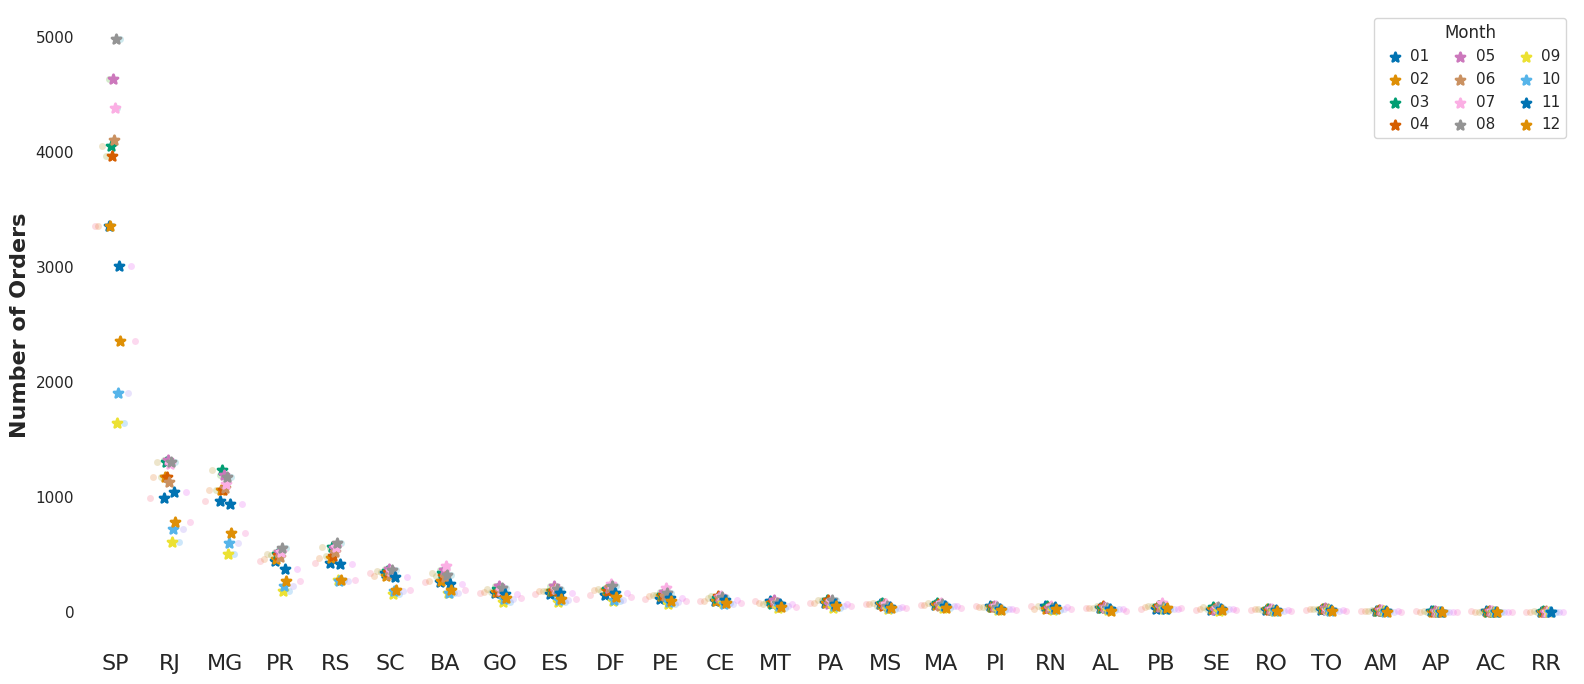

In [22]:
f, ax = plt.subplots(figsize=(16,7))

sns.despine(bottom=True, left=True)
sns.set_theme(style="whitegrid")


sns.stripplot(
    state, y="Order_Count", x="State", hue="Month",
    dodge=True, alpha=.25, zorder=1, legend=False,
)

sns.pointplot(
    state, y="Order_Count", x="State", hue="Month", 
    dodge=.2, palette="colorblind", errorbar=None,
    markers="*", linestyles="none",
)

# Improve the legend
sns.move_legend(
    ax, loc="upper right", ncol=3, frameon=True, columnspacing=1, handletextpad=0,
)
plt.ylabel("Number of Orders", fontsize=16, weight='bold')
plt.xlabel("")
plt.xticks(rotation=0, ha='center', fontsize=16)
plt.tight_layout()
plt.show();

## **Impact on Economy: Analyze the money movement by e-commerce by looking at order prices, freight and others.**

## Precentage increase in the cost of orders from year 2017 to 2018 (months between Jan to Aug only).
> **In January, the payment amount significantly surges by 705%, which is approximately three times higher than February. Meanwhile, August experiences a drastic decrease, being 14 times less than January.**

In [23]:
query = '''
SELECT 
    strftime('%m', o.order_purchase_timestamp) AS Month,
    ROUND((
        (
            SUM(CASE WHEN strftime('%Y', o.order_purchase_timestamp) = '2018' AND
            strftime('%m', o.order_purchase_timestamp) BETWEEN '01' AND '08' THEN p.payment_value END)
            -
            SUM(CASE WHEN strftime('%Y', o.order_purchase_timestamp) = '2017' AND
            strftime('%m', o.order_purchase_timestamp) BETWEEN '01' AND '08' THEN p.payment_value END)
        )
        /
        SUM(CASE WHEN strftime('%Y', o.order_purchase_timestamp) = '2017' AND
        strftime('%m', o.order_purchase_timestamp) BETWEEN '01' AND '08' THEN p.payment_value END)
    ) * 100,1) AS 'Cost Percentage'
FROM orders AS o
JOIN payments AS p
ON p.order_id = o.order_id
WHERE
    strftime('%Y', o.order_purchase_timestamp) BETWEEN '2017' AND '2018' AND 
    strftime('%m', o.order_purchase_timestamp) BETWEEN '01' AND '08'
GROUP BY 1
ORDER BY 2 DESC;
'''
pd.read_sql_query(query, conn)

,Month,Cost Percentage
0,01,705.1
1,02,240.0
2,04,177.8
3,03,157.8
4,06,100.3
5,05,94.6
6,07,80.0
7,08,51.6


## **Analysis based on sales, freight and delivery time.**

In [24]:
'''
Find the no. of days taken to deliver each order from the order’s purchase date as delivery time. 
Also, calculate the difference (in days) between the estimated & actual delivery date of an order.

You can calculate the delivery time and the difference between the estimated & actual delivery date using the given formula:
* time_to_deliver = order_delivered_customer_date - order_purchase_timestamp
* diff_estimated_delivery = order_delivered_customer_date - order_estimated_delivery_date
'''

query = '''
SELECT 
    order_id,
    ROUND(julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp),2) AS time_to_deliver,
    ROUND(julianday(order_delivered_customer_date) - julianday(order_estimated_delivery_date),2) AS diff_estimated_delivery
FROM orders
WHERE order_status = 'delivered' AND julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp) IS NOT NULL
ORDER BY 2;
'''
pd.read_sql_query(query, conn)

,order_id,time_to_deliver,diff_estimated_delivery
0,1d893dd7ca5f77ebf5f59f0d2017eee0,0.53,-10.12
1,434cecee7d1a65fc65358a632b6f725f,0.78,-19.66
2,f3c6775ba3d2d9fe2826f93b71f12008,0.86,-11.66
3,8339b608be0d84fca9d8da68b58332c3,0.86,-27.27
4,e65f1eeee1f52024ad1dcd03447f7482,0.89,-9.48
...,...,...,...
96465,285ab9426d6982034523a855f55a885e,194.63,166.58
96466,2fb597c2f772eca01b1f5c561bf6cc7b,194.85,155.61
96467,440d0d17af552815d15a9e41abe49359,195.63,165.63
96468,1b3190b2dfa9d789e1f14c05b647a14a,208.35,188.98


In [25]:
# Find out the top 5 states with the highest Freight
query = '''
WITH Freight AS (
    SELECT 
        c.customer_state AS State,
        AVG(ot.freight_value) AS Average_Freight
    FROM orders o
    JOIN order_items ot ON o.order_id = ot.order_id
    JOIN customers c ON c.customer_id = o.customer_id
    GROUP BY 1
)
SELECT 
    State,
    Average_Freight
FROM (
    SELECT 
        State,
        Average_Freight,
        RANK() OVER (ORDER BY Average_Freight DESC) AS High
    FROM Freight
) AS Ranked_States
WHERE High <= 5;
'''
avg_freight = pd.read_sql_query(query, conn)
avg_freight

,State,Average_Freight
0,RR,42.984423
1,PB,42.723804
2,RO,41.069712
3,AC,40.073370
4,PI,39.147970


In [26]:
# Find out the top 5 states with the highest Time to delivery
query = '''
WITH delivery AS (
    SELECT 
        c.customer_state AS State,
        AVG(julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp)) AS time_to_deliver
    FROM orders o
    JOIN customers c ON c.customer_id = o.customer_id
    WHERE order_status = 'delivered' AND julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp) IS NOT NULL
    GROUP BY 1
)
SELECT 
    State,
    time_to_deliver
FROM (
    SELECT 
        State,
        time_to_deliver,
        RANK() OVER (ORDER BY time_to_deliver DESC) AS High
    FROM delivery
) AS Ranked_States
WHERE High <= 5;
'''
time_deliver = pd.read_sql_query(query, conn)
time_deliver

,State,time_to_deliver
0,RR,29.387546
1,AP,27.185068
2,AM,26.425991
3,AL,24.543855
4,PA,23.772917


In [27]:
# Find out the top 5 states where the order delivery is really fast as compared to the estimated date of delivery.
query = '''
WITH delivery AS (
    SELECT 
        c.customer_state AS State,
        ABS(AVG(julianday(order_delivered_customer_date) - julianday(order_estimated_delivery_date))) AS delivery_fast
    FROM orders o
    JOIN customers c ON c.customer_id = o.customer_id
    WHERE order_status = 'delivered' AND julianday(order_delivered_customer_date) - julianday(order_estimated_delivery_date) IS NOT NULL
    GROUP BY 1
)
SELECT 
    State,
    delivery_fast
FROM (
    SELECT 
        State,
        delivery_fast,
        RANK() OVER (ORDER BY delivery_fast DESC) AS High
FROM delivery
) AS Ranked_States
WHERE High <= 5;
'''
delivery_speed = pd.read_sql_query(query, conn)
delivery_speed

,State,delivery_fast
0,AC,20.077007
1,RO,19.396826
2,AP,19.059423
3,AM,18.851817
4,RR,16.594598


In [28]:
# Combine data into a single DataFrame for the sunburst chart
data = []

for index, row in avg_freight.iterrows():
    data.append({
        'State': row['State'],
        'Metric': 'Average Freight',
        'Value': row['Average_Freight']
    })

for index, row in time_deliver.iterrows():
    data.append({
        'State': row['State'],
        'Metric': 'Time to Deliver',
        'Value': row['time_to_deliver']
    })

for index, row in delivery_speed.iterrows():
    data.append({
        'State': row['State'],
        'Metric': 'Delivery Speed',
        'Value': row['delivery_fast']
    })

# Convert list to DataFrame
df = pd.DataFrame(data)
px.sunburst(df, path=["Metric", "State"], values="Value", title="State-wise Freight, Delivery Time, and Speed")

## **Analysis based on the payments:**

# Month on Month number of orders placed using different payment types.
> **The data indicates that Credit Card is the preferred payment type for most customers, possibly due to cashback or offers. UPI follows closely in usage, while vouchers and debit cards are favored by a smaller group of customers.**

In [29]:
query = '''
SELECT
    p.payment_type AS 'Payment Type',
    strftime('%m', order_purchase_timestamp) AS Months,
    COUNT(DISTINCT o.order_id) AS 'Count Orders'
FROM payments p
JOIN orders o
ON o.order_id = p.order_id
WHERE o.order_status = 'delivered' and p.payment_type = 'credit_card'
GROUP BY 1,2
ORDER BY 2,1
'''
data = pd.read_sql_query(query, conn)
month_names = {f"{month:02d}": calendar.month_name[month] for month in range(1, 13)}
data["Months"] = data["Months"].map(month_names)
credit_card = data.copy()
credit_card['credit'] = 0

In [30]:
query = '''
SELECT
    p.payment_type AS 'Payment Type',
    COUNT(DISTINCT o.order_id) AS 'Count Orders'
FROM payments p
JOIN orders o
ON o.order_id = p.order_id
WHERE o.order_status = 'delivered'
GROUP BY 1
ORDER BY 2 DESC,1
'''
data = pd.read_sql_query(query, conn)
print(pd.read_sql_query(query, conn))

pie_dict = dict(zip(data["Payment Type"],data["Count Orders"]))

fig = go.Figure(data=[go.Pie(labels=list(pie_dict.keys()), values=list(pie_dict.values()), hole=0.7)])
fig.update_layout(title="Order Count by Payment Type")

fig.show()

  Payment Type  Count Orders
0  credit_card         74304
1          UPI         19191
2      voucher          3679
3   debit_card          1485


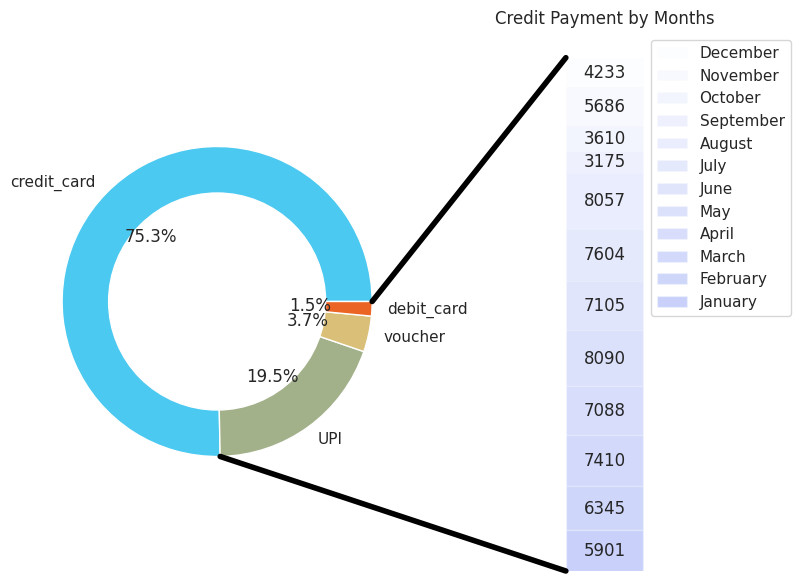

In [31]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = list(pie_dict.values())
labels = list(pie_dict.keys())
explode = [0, 0, 0, 0]
colors = ["#4cc9f0", "#a3b18a", "#d9bf77", "#eb6424"]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=colors)
# Draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax1.add_artist(centre_circle)  # Add circle to the pie chart axis


# bar chart parameters
age_ratios = credit_card["Count Orders"]
age_labels = credit_card["Months"]
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='#4361ee', label=label,
                 alpha=0.01 + 0.025*j)
    ax2.bar_label(bc, labels=[f"{height}"], label_type='center')

ax2.set_title('Credit Payment by Months')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = bottom

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

## The Month on Month number of orders placed using different payment types.
> **The data indicates that Credit Card is the preferred payment type for most customers, possibly due to cashback, debt or offers. UPI follows closely in usage, while vouchers and debit cards are favored by a smaller group of customers.**

In [32]:
# Find 
query = '''
SELECT
    p.payment_type AS 'Payment Type',
    strftime('%m', order_purchase_timestamp) AS Months,
    COUNT(DISTINCT o.order_id) AS 'Count Orders'
FROM payments p
JOIN orders o
ON o.order_id = p.order_id
WHERE o.order_status = 'delivered' and p.payment_type != 'credit_card'
GROUP BY 1,2
ORDER BY 2,1
'''
group = pd.read_sql_query(query, conn)
month_names = {f"{month:02d}": calendar.month_name[month] for month in range(1, 13)}
group["Months"] = group["Months"].map(month_names)
group

,Payment Type,Months,Count Orders
0,UPI,January,1661
1,debit_card,January,118
2,voucher,January,324
3,UPI,February,1665
4,debit_card,February,81
5,voucher,February,277
6,UPI,March,1881
7,debit_card,March,104
8,voucher,March,384
9,UPI,April,1739


In [33]:
pivot_df =pd.pivot_table(group, index="Payment Type", columns="Months", aggfunc="sum", values="Count Orders")
pivot_df

Months,April,August,December,February,January,July,June,March,May,November,October,September
Payment Type,,,,,,,,,,,,
UPI,1739,2021,1134,1665,1661,2011,1778,1881,1982,1445,1006,868
debit_card,119,303,62,81,118,254,205,104,78,65,53,43
voucher,342,368,214,277,324,402,368,384,367,257,205,171


In [34]:
fig = px.bar(group, x='Months', y="Count Orders", color='Payment Type',
             title='Monthly Orders for Different Payment Methods',
             labels={'Months': 'Month', 'Count Orders': 'Number of Orders'},
             barmode='group')
fig.update_layout(plot_bgcolor="white", xaxis_tickangle=-45)
fig.show()

## The numbers of orders placed on the basis of the payment installments that have been paid.
> **Customers prefer to pay in full, utilizing a combination of UPI, debit card, voucher, and credit card. Introducing a new column for payment type could reveal insightful information.**

In [35]:
# Find the no. of orders placed on the basis of the payment installments that have been paid.
query = '''
SELECT 
    p.payment_type AS 'Payment Type',
    p.payment_installments AS 'Payment Installments',
    COUNT(DISTINCT o.order_id) AS 'Count Orders'
FROM payments p
JOIN orders o
ON o.order_id = p.order_id
WHERE o.order_status = 'delivered'
GROUP BY 1,2
ORDER BY 1
'''
data = pd.read_sql_query(query, conn)
data

,Payment Type,Payment Installments,Count Orders
0,UPI,1,19191
1,credit_card,0,2
2,credit_card,1,24711
3,credit_card,2,12052
4,credit_card,3,10147
5,credit_card,4,6882
6,credit_card,5,5090
7,credit_card,6,3800
8,credit_card,7,1560
9,credit_card,8,4122


In [36]:
px.sunburst(data, path=["Payment Installments", "Payment Type"], values="Count Orders", title="Orders Installments paid using different payment types")

# **Please upvote if you found this notebook helpful.**